In [2]:
import sklearn
import scipy
import pycaret
import botorch
import torch
import gpytorch
import pandas as pd

In [3]:
!ls ../datagen

Materials.csv                     histograma_cutting_force.csv
Tabela_de_materiais.xlsx          modeling.ipynb
automation_audit.py               old
data_prep.ipynb                   resultados
data_prep_segunda_rodada_v1.ipynb resultados.zip
data_to_modeling.csv


In [4]:
df=pd.read_csv("../datagen/data_to_modeling.csv",sep='\t',index_col=0)
df

,material,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0,AISI_1045,0.25,1000,-7,5,261.158856,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1,AISI_1045,0.25,1000,-4,5,232.763364,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2,AISI_1045,0.25,1000,-1,5,209.399634,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3,AISI_1045,0.25,1000,2,5,215.371140,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4,AISI_1045,0.25,1000,5,5,222.345370,553.0,600.0,0.0134,0.234,1.00,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,AISI_1020,0.25,4500,2,5,75.304756,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
499,AISI_1020,0.25,4500,5,5,73.459843,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
500,AISI_1020,0.25,4500,8,5,72.443460,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280
501,AISI_1020,0.25,4500,11,5,73.213914,213.0,53.0,0.0055,0.340,0.81,0.05,3.44,-2.12,0.0020,0.61,2.700000e-09,206000.0,0.280


In [5]:
ignore_features=["d1","d2","d3","d4","d5","densidade","material"] #devido a erro no pycaret, vou fazer exclusão forçada das variáveis
df_1=df.drop(ignore_features,axis=1)

In [6]:
df_1.isna().any()

depth                 False
vc                    False
rake_angle            False
clearance_angle       False
expected_cut_force    False
A                     False
B                     False
C                     False
n                     False
m                     False
young_modulus         False
poisson_coef          False
dtype: bool

# Modelagem com expansão nas features

In [7]:
from pycaret.regression import *
s = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          profile=False
)

,Description,Value
0,Session id,3867
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(431, 12)"
4,Transformed data shape,"(431, 78)"
5,Transformed train set shape,"(301, 78)"
6,Transformed test set shape,"(130, 78)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,None


In [10]:
best = compare_models(include=["rf","gbr","lightgbm","et","lr","ridge","llar","lasso","en","ada","dt","br","knn","dummy"])
s.get_leaderboard()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,28.6404,2717.2017,49.3409,0.9787,0.0815,0.0555,0.0410
lightgbm,Light Gradient Boosting Machine,30.4893,2834.5729,50.5271,0.9775,0.0906,0.0652,0.1750
gbr,Gradient Boosting Regressor,30.5786,2959.3065,52.1651,0.9769,0.0869,0.0602,0.0250
et,Extra Trees Regressor,31.6687,3397.2219,55.3797,0.9732,0.0867,0.0595,0.0310
lr,Linear Regression,38.2816,4119.0507,61.3839,0.9673,0.1310,0.0938,0.0030
ridge,Ridge Regression,38.9823,4157.4542,61.8029,0.9671,0.1325,0.0957,0.0040
ada,AdaBoost Regressor,45.7727,4155.4428,63.2148,0.9671,0.1397,0.1128,0.0090
dt,Decision Tree Regressor,35.0479,4254.1594,60.7886,0.9665,0.0995,0.0654,0.0040
llar,Lasso Least Angle Regression,41.7102,4369.7735,63.7611,0.9656,0.1412,0.1052,0.0040
lasso,Lasso Regression,41.7403,4369.2128,63.7719,0.9656,0.1413,0.1053,0.0080


,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Random Forest Regressor,(TransformerWrapper(transformer=PolynomialFeat...,28.6404,2717.2017,49.3409,0.9787,0.0815,0.0555
1,Gradient Boosting Regressor,(TransformerWrapper(transformer=PolynomialFeat...,30.5786,2959.3065,52.1651,0.9769,0.0869,0.0602
2,Light Gradient Boosting Machine,(TransformerWrapper(transformer=PolynomialFeat...,30.4893,2834.5729,50.5271,0.9775,0.0906,0.0652
3,Extra Trees Regressor,(TransformerWrapper(transformer=PolynomialFeat...,31.6687,3397.2219,55.3797,0.9732,0.0867,0.0595
4,Linear Regression,(TransformerWrapper(transformer=PolynomialFeat...,38.2816,4119.0507,61.3839,0.9673,0.1310,0.0938
5,Ridge Regression,(TransformerWrapper(transformer=PolynomialFeat...,38.9823,4157.4542,61.8029,0.9671,0.1325,0.0957
6,Lasso Least Angle Regression,(TransformerWrapper(transformer=PolynomialFeat...,41.7102,4369.7735,63.7611,0.9656,0.1412,0.1052
7,Lasso Regression,(TransformerWrapper(transformer=PolynomialFeat...,41.7403,4369.2128,63.7719,0.9656,0.1413,0.1053
8,Elastic Net,(TransformerWrapper(transformer=PolynomialFeat...,41.7957,4367.1625,63.8034,0.9656,0.1414,0.1054


## Investigando Lasso

In [21]:
lasso=create_model("lasso")
lasso

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51.3943,5834.1254,76.3814,0.9560,0.1717,0.1289
1,49.5655,4894.0353,69.9574,0.9722,0.1656,0.1352
2,36.3872,2789.5774,52.8164,0.9781,0.1531,0.1022
3,57.7342,8110.8285,90.0601,0.9514,0.1822,0.1321
4,27.6255,2707.9588,52.0381,0.9745,0.1229,0.0783
5,25.0337,1434.8666,37.8796,0.9887,0.1030,0.0756
6,29.2206,1553.3261,39.4123,0.9865,0.0893,0.0677
7,36.8720,4636.7315,68.0935,0.9719,0.1701,0.1197
8,39.1639,4252.9383,65.2146,0.9616,0.1150,0.0856


Lasso(random_state=365)

In [22]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

B : 0.6425
depth*A : 2.4615
vc*C : 0.3201
vc*n : 0.0028
vc*m : 0.0011
vc*poisson_coef : 0.0339
rake_angle^2 : 0.2361
rake_angle*A : 0.0239
rake_angle*poisson_coef : 18.4630
clearance_angle*A : 0.0642
A^2 : 0.0002
A*C : 4.2477
A*poisson_coef : 0.5080
B*C : 0.9909
B*poisson_coef : 0.2519
C*young_modulus : 0.0191
young_modulus*poisson_coef : 0.1236


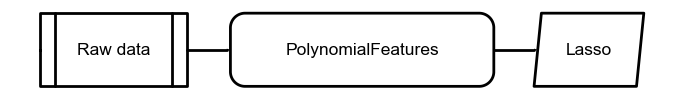

In [23]:
plot_model(lasso,"pipeline")

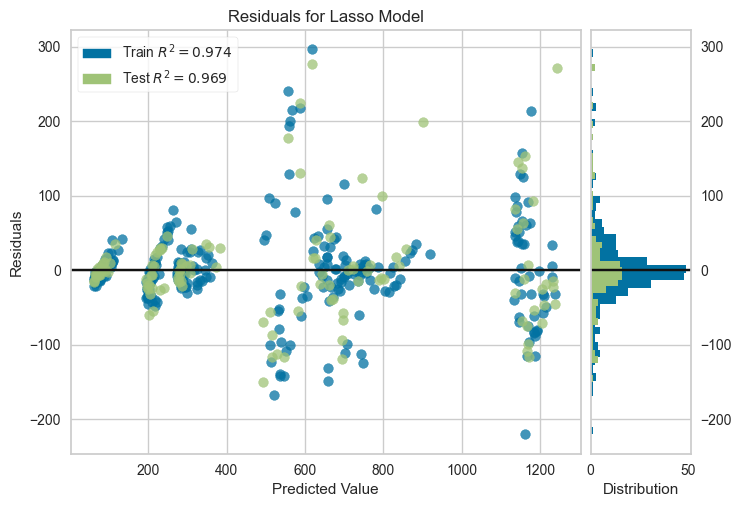

In [24]:
plot_model(lasso, plot='residuals')

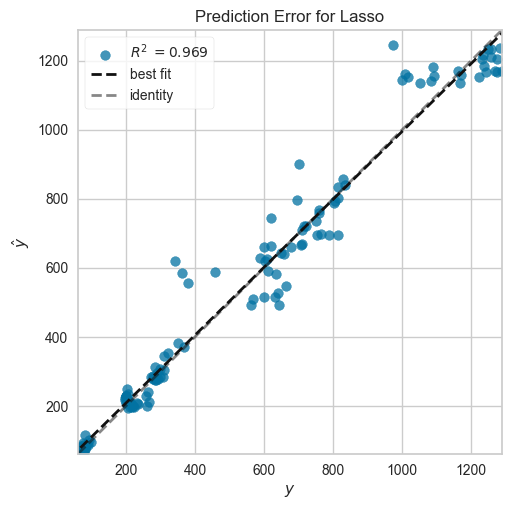

In [25]:
plot_model(lasso, plot='error')

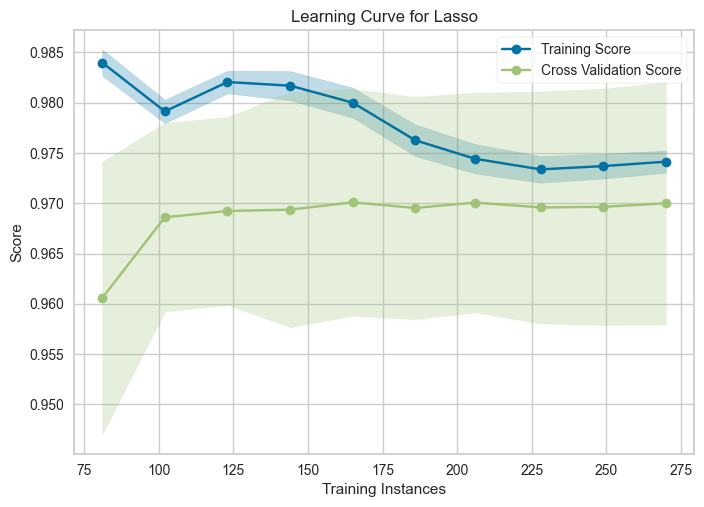

In [26]:
plot_model(lasso, plot='learning')

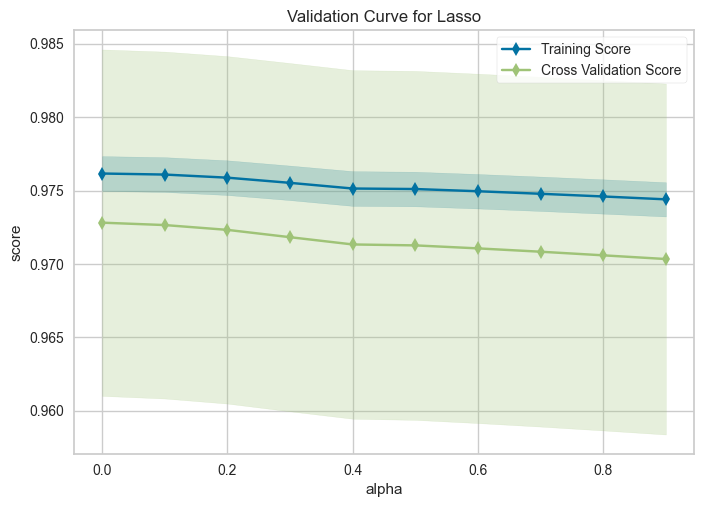

In [27]:
plot_model(lasso, plot='vc')

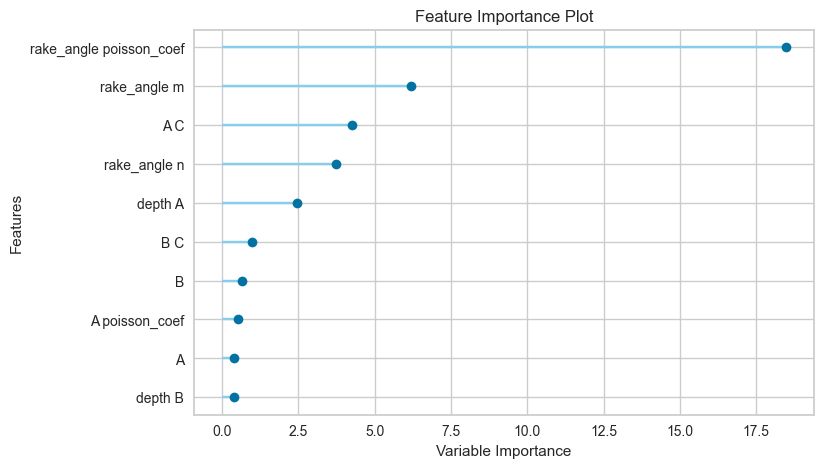

In [28]:
plot_model(lasso, plot='feature')

In [29]:
save_model(lasso,"models/lasso_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('trained_model', Lasso(random_state=365))]),
 'models/lasso_v0.pkl')

### investigando estatisticas dos pesos do lasso

## Investigando LightGBM

In [30]:
lgbm=create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.0744,2333.6716,48.3081,0.9824,0.1007,0.0688
1,30.8797,2246.2905,47.3950,0.9873,0.0853,0.0653
2,26.9019,1867.3027,43.2123,0.9853,0.0813,0.0586
3,43.6740,5207.1721,72.1607,0.9688,0.1148,0.0830
4,22.9114,1659.3899,40.7356,0.9844,0.0842,0.0525
5,22.6521,933.4195,30.5519,0.9926,0.0822,0.0679
6,28.6560,2292.0814,47.8757,0.9801,0.0789,0.0525
7,32.9881,3786.8834,61.5377,0.9771,0.1278,0.0821
8,37.7177,3796.1939,61.6133,0.9658,0.0937,0.0696


In [31]:
lgbm

LGBMRegressor(n_jobs=-1, random_state=365)

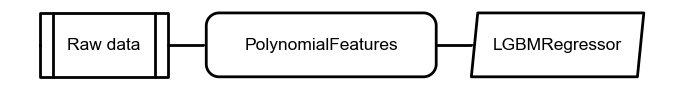

In [32]:
plot_model(lgbm, "pipeline")

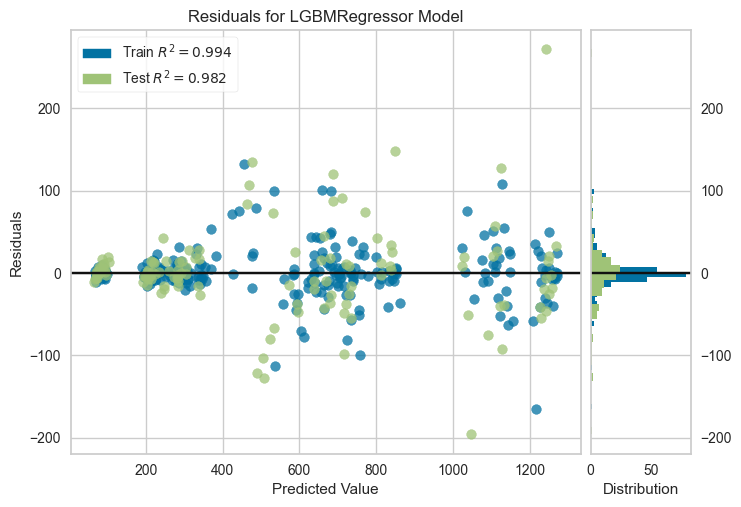

In [33]:
plot_model(lgbm, plot='residuals')

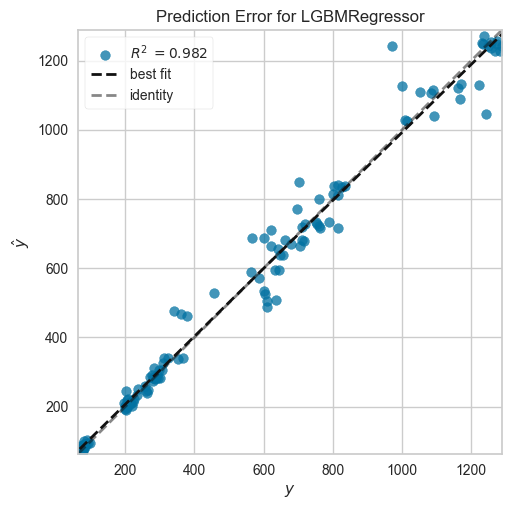

In [34]:
plot_model(lgbm, plot='error')

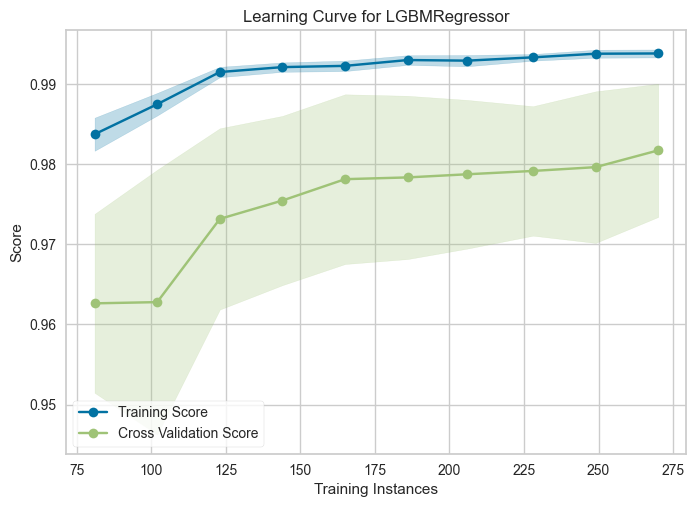

In [35]:
plot_model(lgbm, plot='learning')

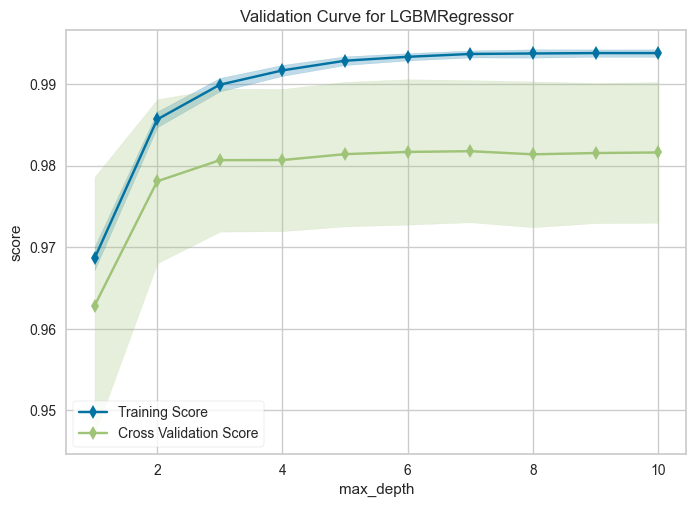

In [36]:
plot_model(lgbm, plot='vc')

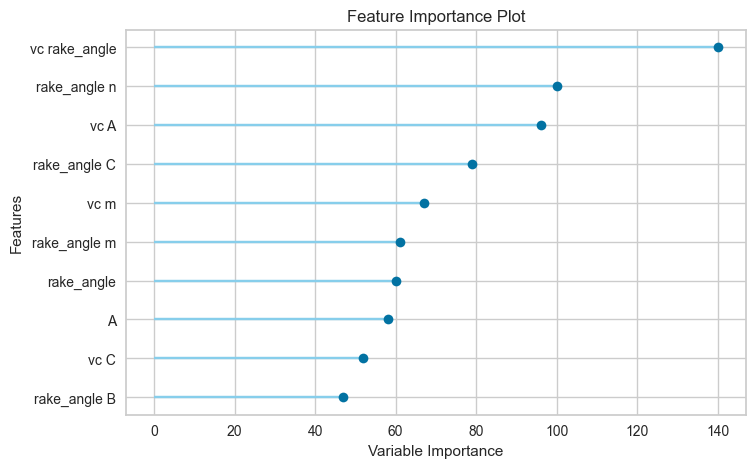

In [37]:
plot_model(lgbm, plot='feature')

In [38]:
save_model(lgbm,"models/lgbm_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=365))]),
 'models/lgbm_v0.pkl')

# Modelagem sem polynomial features

In [39]:
s = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=False,
          profile=False
)

,Description,Value
0,Session id,3370
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(431, 12)"
4,Transformed data shape,"(431, 12)"
5,Transformed train set shape,"(301, 12)"
6,Transformed test set shape,"(130, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,None


In [40]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,30.0360,2935.3339,52.2894,0.9790,0.0847,0.0568,0.0250
gbr,Gradient Boosting Regressor,34.3060,3200.0857,55.0983,0.9771,0.1065,0.0760,0.0090
et,Extra Trees Regressor,31.3848,3211.3285,55.3992,0.9766,0.0910,0.0603,0.0170
lightgbm,Light Gradient Boosting Machine,34.7861,3414.3705,56.9365,0.9760,0.1079,0.0773,0.0980
dt,Decision Tree Regressor,35.1825,4335.8152,63.2625,0.9681,0.1010,0.0649,0.0030
ada,AdaBoost Regressor,49.0144,4634.8634,67.4858,0.9669,0.1356,0.1115,0.0050
lr,Linear Regression,51.7291,6032.5043,76.5232,0.9548,0.1459,0.1122,0.0040
llar,Lasso Least Angle Regression,80.8678,11977.4148,108.6328,0.9131,0.2666,0.2231,0.0040
knn,K Neighbors Regressor,76.0522,14885.9047,115.8802,0.9008,0.2202,0.1683,0.0050
lasso,Lasso Regression,104.2782,20669.0809,142.3978,0.8520,0.3435,0.2982,0.0040


## Investigando Lasso

In [41]:
lasso=create_model("lasso")
lasso

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,115.5897,23408.4438,152.9982,0.7984,0.4072,0.3766
1,87.5924,15413.7844,124.1523,0.9148,0.1832,0.1407
2,97.2784,19471.4520,139.5401,0.8677,0.3662,0.3190
3,91.2651,16242.9879,127.4480,0.8496,0.3133,0.2597
4,76.5544,14003.8180,118.3377,0.9012,0.3279,0.2436
5,103.5340,19558.6281,139.8522,0.8230,0.3692,0.3205
6,123.1940,23706.9108,153.9705,0.8001,0.4002,0.3817
7,126.1435,27089.1679,164.5879,0.8700,0.3383,0.2886
8,81.9827,14645.8991,121.0202,0.8973,0.3010,0.2413


Lasso(random_state=3370)

In [42]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

vc : 0.0081
rake_angle : 0.5067
A : 2.1849
B : 0.9397
n : 68.1504
m : 987.5648
poisson_coef : 15014.4361


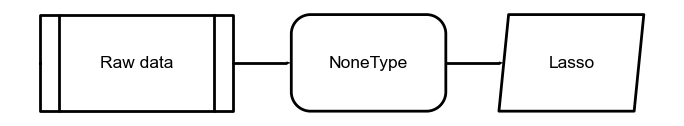

In [43]:
plot_model(lasso,"pipeline")

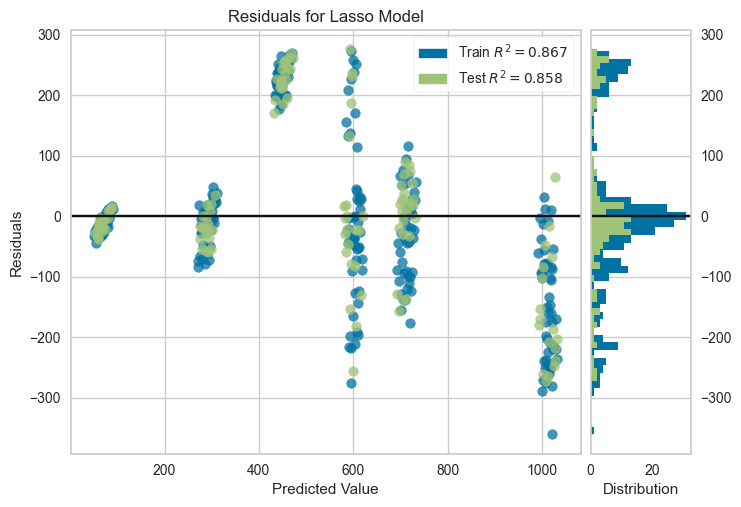

In [44]:
plot_model(lasso, plot='residuals')

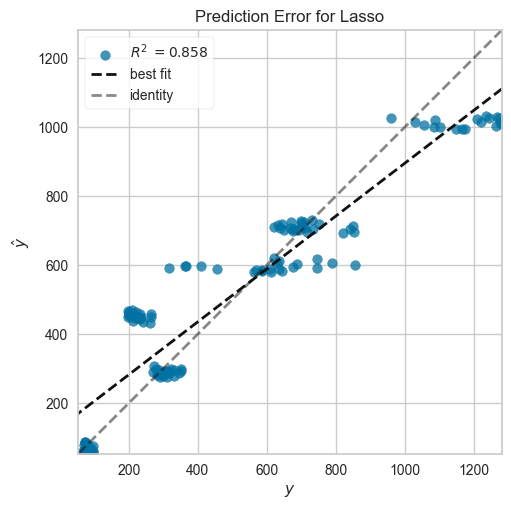

In [45]:
plot_model(lasso, plot='error')

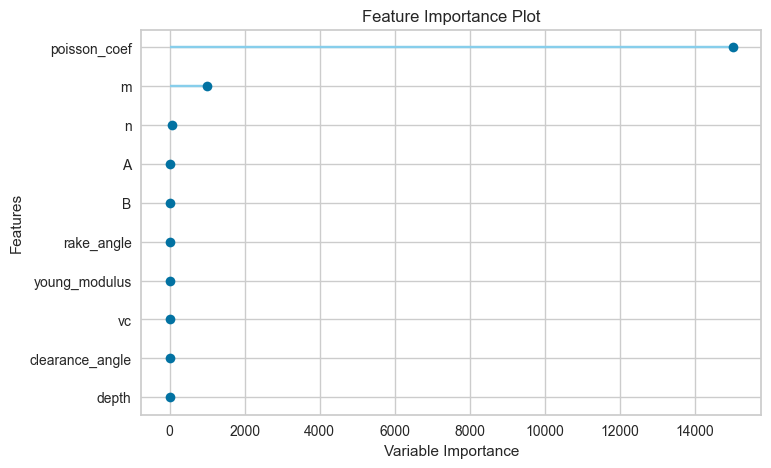

In [46]:
plot_model(lasso, plot='feature')

In [47]:
save_model(lasso,"models/lasso_v1",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model', Lasso(random_state=3370))]),
 'models/lasso_v1.pkl')

## Investigando LightGBM

In [48]:
lgbm=create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.7543,3661.8130,60.5129,0.9685,0.1192,0.0842
1,35.3799,2652.9670,51.5070,0.9853,0.0986,0.0776
2,32.8745,2450.7065,49.5046,0.9834,0.0797,0.0633
3,22.1994,1259.2081,35.4853,0.9883,0.0772,0.0549
4,38.0718,4515.8006,67.1997,0.9682,0.1105,0.0895
5,28.8469,2395.8418,48.9473,0.9783,0.0818,0.0561
6,28.3317,2432.9721,49.3252,0.9795,0.1075,0.0652
7,30.5655,2598.3782,50.9743,0.9875,0.0813,0.0607
8,47.4853,5567.9944,74.6190,0.9610,0.1913,0.1374


In [49]:
lgbm

LGBMRegressor(n_jobs=-1, random_state=3370)

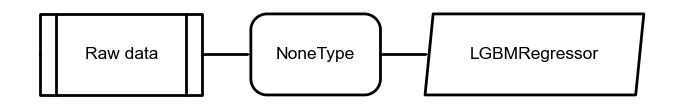

In [50]:
plot_model(lgbm, "pipeline")

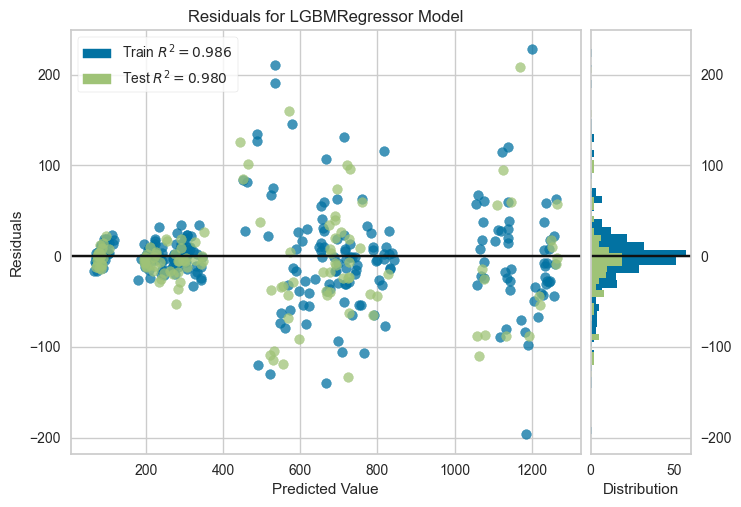

In [51]:
plot_model(lgbm, plot='residuals')

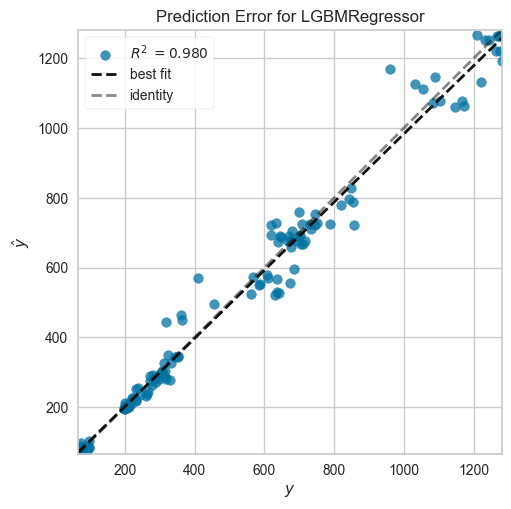

In [52]:
plot_model(lgbm, plot='error')

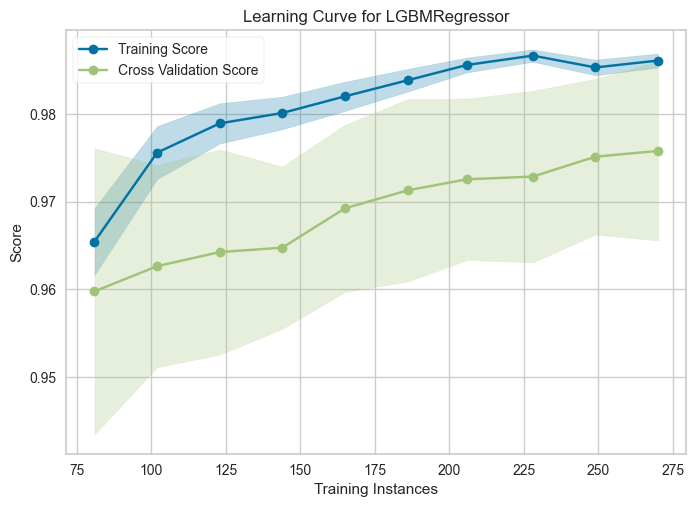

In [53]:
plot_model(lgbm, plot='learning')

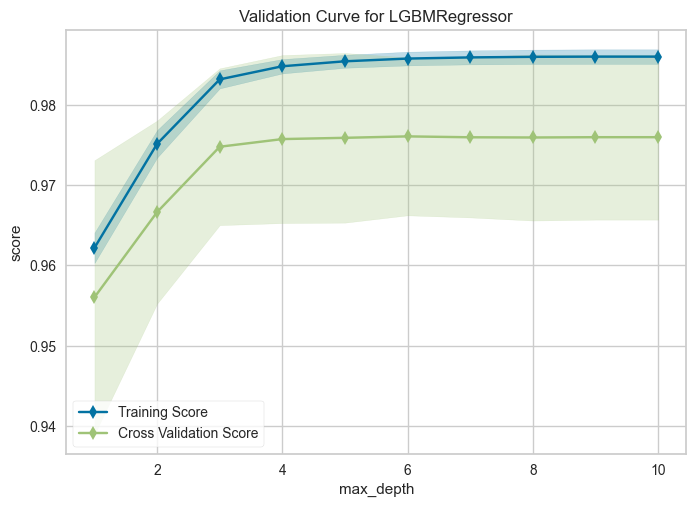

In [54]:
plot_model(lgbm, plot='vc')

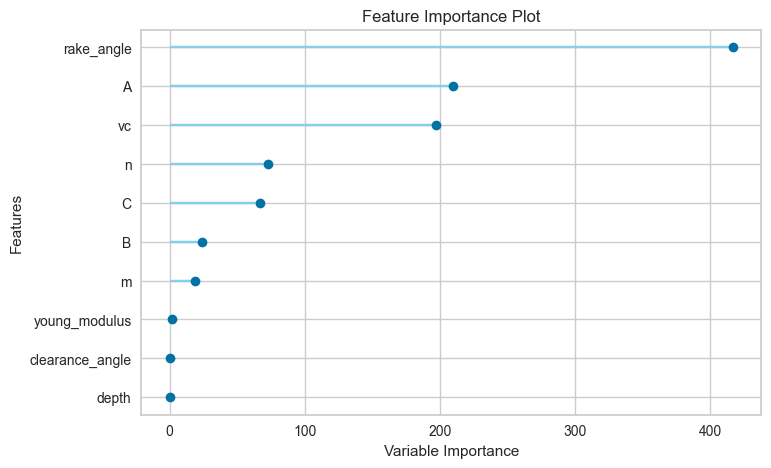

In [55]:
plot_model(lgbm, plot='feature')

In [56]:
save_model(lgbm,"models/lgbm_v1",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=3370))]),
 'models/lgbm_v1.pkl')

# Modelagem com polynomial features mas filtrando variáveis do material

In [57]:
df_1.columns

Index(['depth', 'vc', 'rake_angle', 'clearance_angle', 'expected_cut_force',
       'A', 'B', 'C', 'n', 'm', 'young_modulus', 'poisson_coef'],
      dtype='object')

In [58]:
df_2=df_1.drop([ 'A', 'B', 'C', 'n', 'm',],axis=1)

In [59]:
s = setup(df_2,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_2.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=False,
          profile=False
)

,Description,Value
0,Session id,7418
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(431, 7)"
4,Transformed data shape,"(431, 7)"
5,Transformed train set shape,"(301, 7)"
6,Transformed test set shape,"(130, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,None


In [60]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,55.4257,7563.7914,85.8280,0.9426,0.1862,0.1307,0.0070
lightgbm,Light Gradient Boosting Machine,55.5942,7872.4254,87.3498,0.9405,0.1637,0.1204,0.0880
ada,AdaBoost Regressor,61.3737,8768.5316,92.5421,0.9335,0.1765,0.1346,0.0040
rf,Random Forest Regressor,61.6496,10894.2735,102.8313,0.9180,0.1705,0.1111,0.0190
et,Extra Trees Regressor,72.4360,15466.3082,121.9223,0.8835,0.2042,0.1274,0.0160
dt,Decision Tree Regressor,76.0651,16653.8999,127.2302,0.8757,0.2161,0.1345,0.0030
lr,Linear Regression,200.6490,62527.7950,247.3701,0.5231,0.8117,1.1846,0.0030
lar,Least Angle Regression,200.6490,62527.7950,247.3701,0.5231,0.8117,1.1846,0.0030
llar,Lasso Least Angle Regression,226.6318,74919.9884,272.2542,0.4376,0.7993,1.2021,0.0030
lasso,Lasso Regression,226.6318,74919.9884,272.2542,0.4376,0.7993,1.2021,0.0020


## Investigando Lasso

In [61]:
lasso=create_model("lasso")
lasso

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,167.8447,42400.6445,205.9142,0.5838,0.5604,0.6381
1,221.0970,71076.0961,266.6010,0.3637,0.8848,1.3916
2,236.4433,76148.2187,275.9497,0.5574,0.6704,0.8414
3,229.9885,85199.6756,291.8898,0.2721,0.9611,1.6175
4,244.5456,87144.2215,295.2020,0.3357,0.9533,1.5733
5,265.3501,97420.7738,312.1230,0.2705,1.0061,1.7285
6,220.2678,68011.0493,260.7893,0.5738,0.4619,0.4606
7,220.9601,75358.9481,274.5158,0.4468,0.9179,1.4945
8,248.3552,84532.6119,290.7449,0.4289,0.8663,1.3277


Lasso(random_state=7418)

In [62]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

vc : 0.0110
rake_angle : 0.5861
poisson_coef : 18384.0872


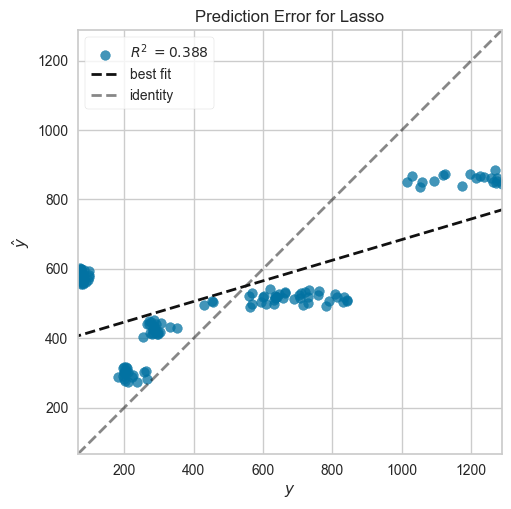

In [63]:
plot_model(lasso, plot='error')

## Investigando LightGBM

In [64]:
lgbm=create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,54.5757,7398.7211,86.0158,0.9274,0.1401,0.1050
1,54.1694,8611.3226,92.7972,0.9229,0.1599,0.1099
2,60.1171,7189.3202,84.7899,0.9582,0.1592,0.1249
3,46.8083,5744.6711,75.7936,0.9509,0.1602,0.1185
4,58.9780,10083.1696,100.4150,0.9231,0.1961,0.1396
5,72.3303,12935.0214,113.7322,0.9031,0.2527,0.1873
6,71.9141,11722.3568,108.2698,0.9265,0.1566,0.1107
7,36.2993,3878.6144,62.2785,0.9715,0.1528,0.1133
8,47.2000,5586.8540,74.7453,0.9623,0.1474,0.1038


In [65]:
lgbm

LGBMRegressor(n_jobs=-1, random_state=7418)

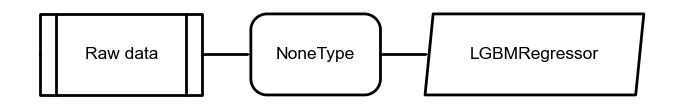

In [66]:
plot_model(lgbm, "pipeline")

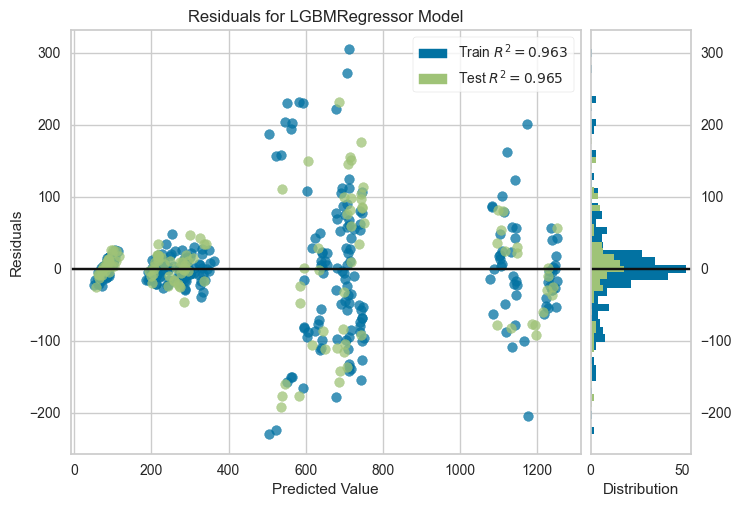

In [67]:
plot_model(lgbm, plot='residuals')

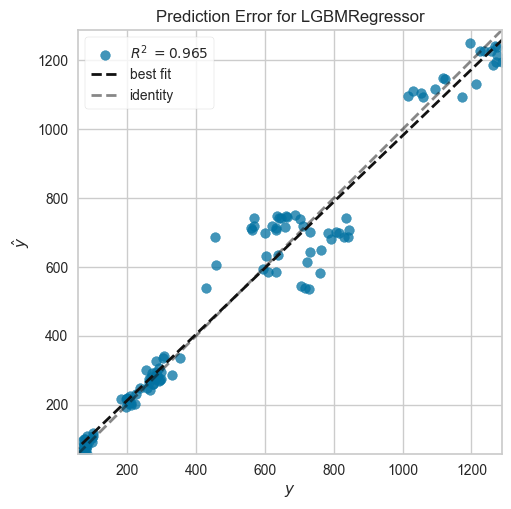

In [68]:
plot_model(lgbm, plot='error')